In [79]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/ASUS/OneDrive/Desktop/laptops.csv")

# Overview
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB
None
                                              Laptop Status   Brand  \
0  ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...    New    Asus   
1  Alurin Go Start Intel Celeron N4020/8GB/256GB ...    New  Alurin   
2  ASUS E

In [81]:
# Features and target
X = df[['RAM', 'Storage', 'Screen', 'Brand']]
y = df['Touch']

In [83]:
# Select relevant columns
df = df[['RAM', 'Storage', 'Screen', 'Brand', 'Touch']]

# Drop missing values
df = df.dropna()

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

le_touch = LabelEncoder()
df['Touch'] = le_touch.fit_transform(df['Touch'])  # Yes=1, No=0

le_brand = LabelEncoder()
df['Brand'] = le_brand.fit_transform(df['Brand'])  # Convert Brand to numbers


In [85]:
# Features and target
X = df[['RAM', 'Storage', 'Screen', 'Brand']]
y = df['Touch']


In [87]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [89]:
from sklearn.tree import DecisionTreeClassifier

# Train model
clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [91]:
from sklearn.metrics import classification_report, accuracy_score

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9375

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       393
           1       0.77      0.44      0.56        39

    accuracy                           0.94       432
   macro avg       0.86      0.71      0.76       432
weighted avg       0.93      0.94      0.93       432



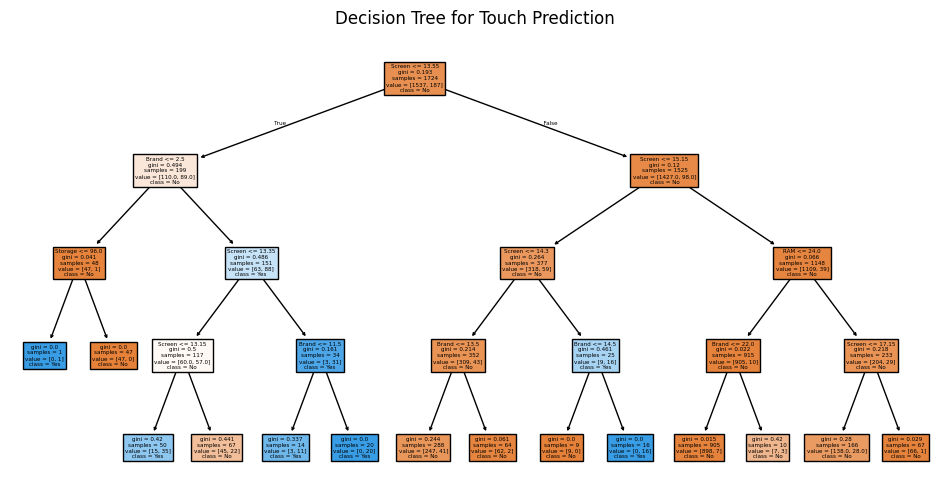

In [93]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=X.columns, class_names=le_touch.classes_, filled=True)
plt.title("Decision Tree for Touch Prediction")
plt.show()
